In [4]:
# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

SyntaxError: invalid syntax (<ipython-input-4-12c0a474ddeb>, line 3)

In [5]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

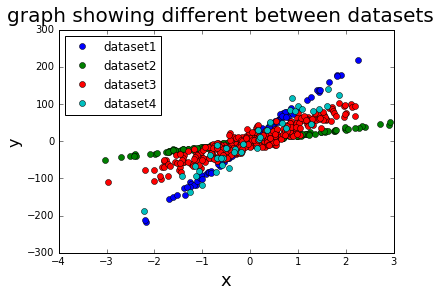

In [6]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
# training dataset 
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
#test set 
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o', label='dataset1')

############### More DATASETS

(x2,y2) = make_regression(n_samples=2*n_samples, n_features=n_dimensions, noise=2)
plt.plot(x2,y2,'o',label='dataset2')
(x3,y3) = make_regression(n_samples=3*n_samples, n_features=n_dimensions, noise=noise*3)
plt.plot(x3,y3,'o', label="dataset3")
(x4,y4) = make_regression(n_samples=40, n_features=n_dimensions, noise=noise*4)
plt.plot(x4,y4,'o',label="dataset4")

#title the graph and label the axis
plt.suptitle('graph showing different between datasets', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)

# show the legend
plt.legend(loc='upper left', numpoints=1)

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

-6.93166914758


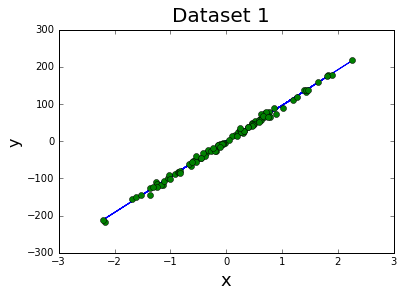

dataset 2, noise is 1
0.989167351531


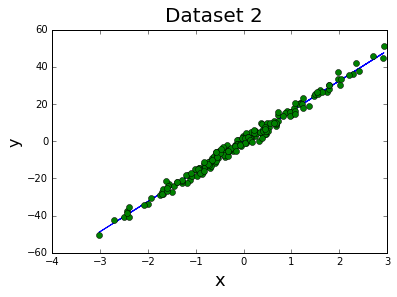

dataset 3, noise is 15
0.877121522536


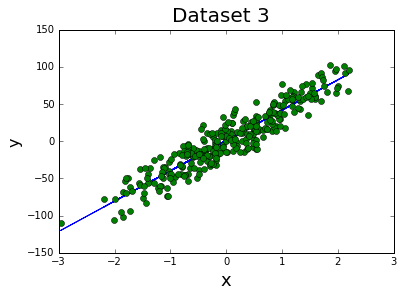

dataset 4, noise is 20
0.91145166454


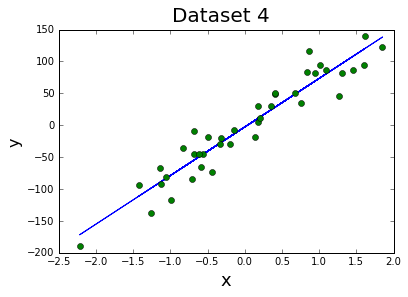

In [7]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.suptitle('Dataset 1', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.show()

#plotting data set 2
regr.fit(x2,y2)
print "dataset 2, noise is 1"
print regr.score(x2,y2)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')
plt.suptitle('Dataset 2', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.show()

#plot and show data set 3
regr.fit(x3,y3)
print "dataset 3, noise is 15"
print regr.score(x3,y3)
plt.plot(x3,regr.predict(x3))
plt.suptitle('Dataset 3', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.plot(x3,y3,'o')
plt.show()

#plotting data set 4
regr.fit(x4,y4)
print "dataset 4, noise is 20"
print regr.score(x4,y4)
plt.plot(x4,regr.predict(x4))
plt.suptitle('Dataset 4', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.plot(x4,y4,'o')
plt.show()


## Your analysis


Adding noise adds extra data to the dataset. As we can see from graph 2 (noise=1), the data is fitted well along 
the linear regression line (linear regression = 0.998). Graph 4 has the most amount of noise (noise=20), and as we can see, the data is more scattered (linear regression = 0.757) . Noise increases the amount of error in our datasets.

dataset 2, noise is 1
0.00853918234674


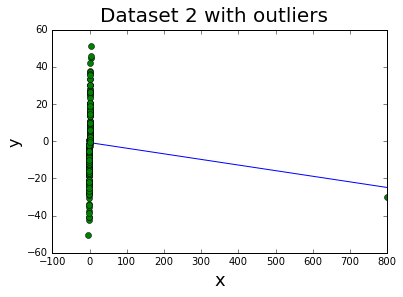

In [8]:
#Add a serious outlier and see what happens
#last data points in dataset 2 are outliers
x2[-1] = 800
y2[-1] = -30

#Example of creating big outlier:
x1[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y1[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
regr.fit(x2,y2)
print "dataset 2, noise is 1"
print regr.score(x2,y2)
plt.plot(x2,regr.predict(x2))
plt.plot(x2,y2,'o')

#create a title and label axis
plt.suptitle('Dataset 2 with outliers', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=16)
plt.show()

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [9]:
#Make a prediction function h
# returns x_predict - make a new matrix
def prediction_function(x,theta0,theta1):
    return np.add(theta0, np.multiply(theta1, x)) 
    
x_predict1 = prediction_function(x1, 0, 1)


In [10]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    return 1/(2 * x_predict.shape[0]) * np.square(np.sum(x_predict - y))

print cost_function(x_predict1, y1)

0.0


In [11]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y, x):
    # have x_predict so we already have all the theta's we need.
    #just take derivative of cost function- not updating it yet. Just the sum of the hypothesis - y and divide by m
    theta0_gradient = np.sum(np.multiply(x_predict,x) - y) / (x_predict.shape[0]) 
    theta1_gradient = np.sum(np.multiply((np.multiply(x_predict,x) - y),x))/(x_predict.shape[0])
    return theta0_gradient ,  theta1_gradient

print compute_gradient(x_predict1, y1, x1)

(919.61434732724558, 8089.1491863944129)


the value for theta0 is -91.961435
the value for theta1 is -807.914919
the value for theta0 is 39083.831670
the value for theta1 is 649903.005598
the value for theta0 is -31438069.804359
the value for theta1 is -521116664.664615
the value for theta0 is 25208296234.991180
the value for theta1 is 417855718803.161560
the value for theta0 is -20213190932071.417969
the value for theta1 is -335056251454401.937500
the value for theta0 is 16207881522383734.000000
the value for theta1 is 268663767410237120.000000
the value for theta0 is -12996237177012334592.000000
the value for theta1 is -215427169634145009664.000000
the value for theta0 is 10420990585837883228160.000000
the value for theta1 is 172739576549280283885568.000000
the value for theta0 is -8356037467691610428932096.000000
the value for theta1 is -138510668626893670973440000.000000
the value for theta0 is 6700261514136279364984111104.000000
the value for theta1 is 111064329939444204815318515712.000000


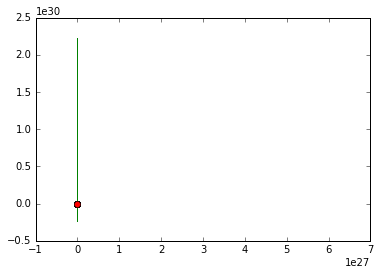

In [23]:
#These are some default parameters, see how playing with them affects the behavior
alpha = 0.1
theta0 = 0
theta1 = 1
x = x1
y = y1
iterations = 10
#Fill in the stopcondition yourself
stopcondition = 0.001

i = 0
cost = 10
#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):
    i = i +1
    #Write gradient descent here - then update the theta's here.
    x_predict = prediction_function(x,theta0,theta1)
    gradient = compute_gradient(x_predict, y, x)
    theta0 = theta0 - (alpha * gradient[0])
    theta1 = theta1 - (alpha * gradient[1])
    print "the value for theta0 is %f" %theta0
    print "the value for theta1 is %f" %theta1
  
      
plt.plot(theta0, theta1)
plt.plot(x,prediction_function(x,theta0,theta1))
plt.plot(x,y,'o')
plt.show()


## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.